<h1 style="text-align:center">Advanced Statistical Inference</h1>
<h1 style="text-align:center">Clustering</h1>

## 1. Aims
<div class="alert alert-info"> 
To implement $k$-means and use it to cluster some data.
</div>

In [1]:
import scipy.io
import numpy as np
mat = scipy.io.loadmat('kmeansdata.mat')

In [2]:
X = mat['X']
print(X.shape)

(100, 2)


## 2. Implement the $k$-means algorithm covered in the lecture (not the kernelised version)

<div class="alert alert-info">

Hints:
<br>
<ul> 
<li> Your code needs to alternate between assigning points to the cluster that they’re closest to and recalculating the means by taking the average of these points.
<li> You may need to add something to your code to deal with the problem of no points being assigned to a particular cluster – set the mean randomly.
<li> You’ll find it easiest to maintain a variable that indicates which cluster each point is assigned to. Be careful not to assign a point to more than one cluster.
<li> Your algorithm should converge in fewer than 20 steps (or thereabouts). If it takes 100, something isn’t right!
</ul>

</div>

In [70]:
from numpy.linalg import norm
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
import itertools
import random

class Kmeans:
    
    def __init__(self):
        pass
    
    import random
 
    def generate_colors(self,n):
        ret = []
        r = int(random.random() * 256)
        g = int(random.random() * 256)
        b = int(random.random() * 256)
        step = 256 / n
        for i in range(n):
            r += step
            g += step
            b += step
            r = int(r) % 256
            g = int(g) % 256
            b = int(b) % 256
            ret.append([r,g,b]) 
        return np.array(ret)
    
    
    def initialize_centroids(self,k,d):
        self.means=np.random.rand(k,d)
        
    def assign_closest(self):
        self.assignments=np.zeros((self.data.shape[0],))
        self.distances=np.zeros((self.data.shape[0],self.means.shape[0]))
        for i in range(self.means.shape[0]):
            dist=np.linalg.norm(self.means[i] - self.data,axis=1)
            self.distances[:,i]=dist
        indexes=np.array([np.argmin(t) for t in self.distances])    
        self.assignments=indexes
        
    def update_means(self):
        self.previous_means=self.means
        for i in range(self.means.shape[0]):
            if(len(self.assignments[self.assignments==i])==0):
                continue
            self.means[i]=np.sum(self.data[np.where(self.assignments==i)],axis=0)/len(self.assignments[self.assignments==i])
        #self.means=np.sum(self.data[np.where(self.assignments==k)],axis=0)/len(self.assignments[self.assignments==k])
    def nochange(self):
        return np.array_equal(self.means,self.previous_means)
    
    def kmeans(self,data, k=2, centroids=None):
        self.data=data
        if(centroids==None):
            self.initialize_centroids(k,self.data.shape[1])
        else:
            self.means=centroids
        self.assign_closest()
        self.update_means()
        while(not self.nochange() ):
            self.assign_closest()  
            self.update_means()
            
            
            
            
    def  plot_results(self):

        colors=self.generate_colors(self.means.shape[0])
        plt.figure(figsize=(15,8))
        for i,key in zip(range(self.means.shape[0]),colors):

            x=self.data[np.where(self.assignments==i)][:,0]
            y=self.data[np.where(self.assignments==i)][:,1]
            c=colors[i]/255.0
            plt.scatter(self.means[i][0],self.means[i][1],c=c.reshape((1,c.shape[0])),marker="X")
            plt.scatter(x,y,c=c)
            
        plt.title('Clustering', fontsize=20)
        plt.ylabel('y-axis', fontsize=15)
        plt.xlabel('x-axis', fontsize=15)
        plt.grid()
        plt.show()

## 3. Run your algorithm for $k$ = 2, 3, 4 and 5. 

<div class="alert alert-info">
In each case, plot the data using a different symbol for each cluster.
</fiv>

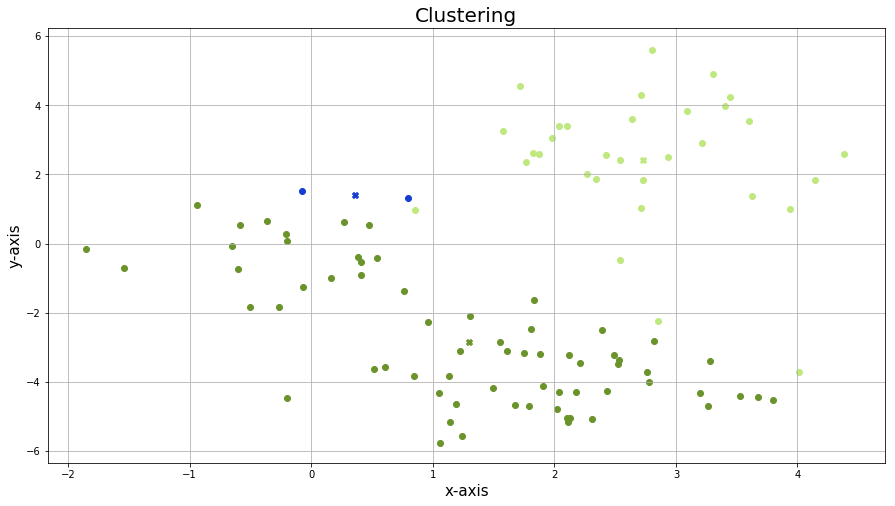

In [97]:
cluster=Kmeans()
cluster.kmeans(X,k=3)
cluster.plot_results()

In [14]:
from sklearn.cluster import KMeans
def generate_colors(n):
    ret = []
    r = int(random.random() * 256)
    g = int(random.random() * 256)
    b = int(random.random() * 256)
    step = 256 / n
    for i in range(n):
        r += step
        g += step
        b += step
        r = int(r) % 256
        g = int(g) % 256
        b = int(b) % 256
        ret.append([r,g,b]) 
    return np.array(ret)
    


def  plot_results(means,data,assignements):

    colors=generate_colors(means.shape[0])
    plt.figure(figsize=(15,8))
    for i,key in zip(range(means.shape[0]),colors):

        x=data[np.where(assignements==i)][:,0]
        y=data[np.where(assignements==i)][:,1]
        c=colors[i]/255.0
        plt.scatter(means[i][0],means[i][1],c=c.reshape((1,c.shape[0])),marker="X")
        plt.scatter(x,y,c=c)
            
    plt.title('Clustering', fontsize=20)
    plt.ylabel('y-axis', fontsize=15)
    plt.xlabel('x-axis', fontsize=15)
    plt.grid()
    plt.show()

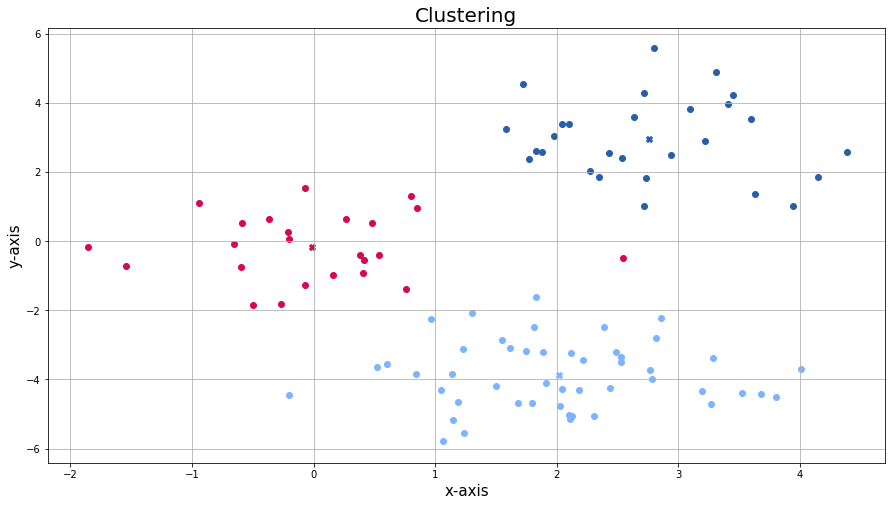

In [85]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)
plot_results(kmeans.cluster_centers_,X,kmeans.labels_)
